In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


In [2]:
import matplotlib.style as style
# style.use('fivethirtyeight')
# style.use('tableau-colorblind10')
plt.style.use("markerr.mplstyle")

In [3]:
# https://stackoverflow.com/questions/33061785/can-i-load-google-fonts-with-matplotlib-and-jupyter

In [4]:
# grid.linestyle: :
# colors5 = ['#5383ad','#7BA0C0','#a3bdd3','#cbd9e6','#f3f6f9']
colors5 = ['#528abb','#74a1ca','#96b7d6','#b8d1e5','#dbe8f1']
colors2 = ['#274456','#7BA0C0']
white = ['#ffffff']
greys = ['#B3B6BA']
blacks = ['#212121']

In [5]:
zori = pd.read_csv('zori.csv')


In [11]:
zori_time = pd.melt(zori,
    id_vars=['RegionName', 'MsaName'],
    value_vars=[
        '2014-01','2014-02','2014-03','2014-04','2014-05','2014-06',
        '2014-07','2014-08','2014-09','2014-10','2014-11','2014-12',
        '2015-01','2015-02','2015-03','2015-04','2015-05','2015-06',
        '2015-07','2015-08','2015-09','2015-10','2015-11','2015-12',
        '2016-01','2016-02','2016-03','2016-04','2016-05','2016-06',
        '2016-07','2016-08','2016-09','2016-10','2016-11','2016-12',
        '2017-01','2017-02','2017-03','2017-04','2017-05','2017-06',
        '2017-07','2017-08','2017-09','2017-10','2017-11','2017-12',
        '2018-01','2018-02','2018-03','2018-04','2018-05','2018-06',
        '2018-07','2018-08','2018-09','2018-10','2018-11','2018-12',
        '2019-01','2019-02','2019-03','2019-04','2019-05','2019-06',
        '2019-07','2019-08','2019-09','2019-10','2019-11','2019-12',
        '2020-01','2020-02','2020-03','2020-04','2020-05','2020-06', 
        '2020-07','2020-08','2020-09','2020-10','2020-11','2020-12', 
        '2021-01','2021-02','2021-03','2021-04','2021-05','2021-06', 
        '2021-07'],
)
zori_time.columns = ['zip_code', 'metro', 'date_str', 'rent_index']


In [14]:
## Convert column to date time and add month and year column
zori_time['date'] = pd.to_datetime(zori_time['date_str'], format='%Y-%m')
zori_time['month'] = pd.DatetimeIndex(zori_time['date']).month
zori_time['year'] = pd.DatetimeIndex(zori_time['date']).year

In [15]:
zori_time

,zip_code,metro,date_str,rent_index,date,month,year
0,10025,"New York, NY",2014-01,2889.0,2014-01-01,1,2014
1,60657,"Chicago, IL",2014-01,1406.0,2014-01-01,1,2014
2,10023,"New York, NY",2014-01,3003.0,2014-01-01,1,2014
3,77494,"Houston, TX",2014-01,1390.0,2014-01-01,1,2014
4,60614,"Chicago, IL",2014-01,1692.0,2014-01-01,1,2014
...,...,...,...,...,...,...,...
203198,10282,"New York, NY",2021-07,5491.0,2021-07-01,7,2021
203199,60606,"Chicago, IL",2021-07,2015.0,2021-07-01,7,2021
203200,10006,"New York, NY",2021-07,2751.0,2021-07-01,7,2021
203201,2109,"Boston, MA",2021-07,2879.0,2021-07-01,7,2021


In [8]:
zori_time.metro.unique()

array(['New York, NY', 'Chicago, IL', 'Houston, TX', 'El Paso, TX',
       'San Francisco, CA', 'Nashville, TN',
       'Los Angeles-Long Beach-Anaheim, CA', 'San Antonio, TX',
       'Washington, DC', 'Charlotte, NC', 'Austin, TX', 'Atlanta, GA',
       'Dallas-Fort Worth, TX', 'St. Louis, MO', 'Seattle, WA',
       'Phoenix, AZ', 'Baltimore, MD', 'Miami-Fort Lauderdale, FL',
       'Virginia Beach, VA', 'Orlando, FL', 'Denver, CO',
       'Sacramento, CA', 'Cleveland, OH', 'Tucson, AZ',
       'Philadelphia, PA', 'Riverside, CA', 'Jacksonville, FL',
       'San Diego, CA', 'Raleigh, NC', 'Portland, OR', 'Fort Myers, FL',
       'Tampa, FL', 'Boston, MA', 'Stamford, CT', 'Cincinnati, OH',
       'Albuquerque, NM', 'Las Vegas, NV', 'Greensboro, NC', 'Tulsa, OK',
       'Columbia, SC', 'San Jose, CA', 'Durham, NC', 'Detroit, MI',
       'Richmond, VA', 'Charleston, SC', 'Birmingham, AL',
       'Fort Collins, CO', 'Greenville, SC', 'Kansas City, MO',
       'Bakersfield, CA', 'Augusta, 

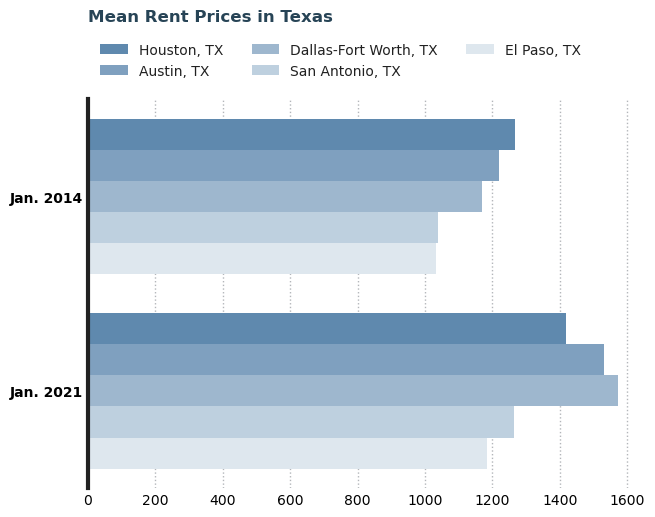

In [30]:
# data set up
graph_df = zori_time[zori_time['metro'].isin(['Dallas-Fort Worth, TX',  
                      'Houston, TX', 
                      'Austin, TX', 
                      'San Antonio, TX',
                      'El Paso, TX'])]
graph_df = graph_df[graph_df['date'].isin(['2014-01','2021-01'])]

# graphing
fig, ax = plt.subplots()
g = sns.barplot(data = graph_df, y = 'date',x='rent_index',hue='metro',
                hue_order = ['Houston, TX','Austin, TX',
                             'Dallas-Fort Worth, TX','San Antonio, TX','El Paso, TX'],
                ci = None, ax=ax,palette=colors5)
# turn off axis labels and titles
g.set(xlabel='', ylabel='',title='Mean Rent Prices in Texas\n\n\n\n')
# legend
sns.move_legend(g,loc='center left', bbox_to_anchor=(0, 1.1),frameon=False,ncol=3,
                title = '')
# axis spine options are ['left','right','bottom','top']
ax.spines['left'].set_visible(True)
# y axis labels
g.set_yticklabels(labels = ['Jan. 2014','Jan. 2021'])
# make the highlighted features bold. should be the same side with the visible spine
plt.yticks(fontweight='bold')

plt.show()

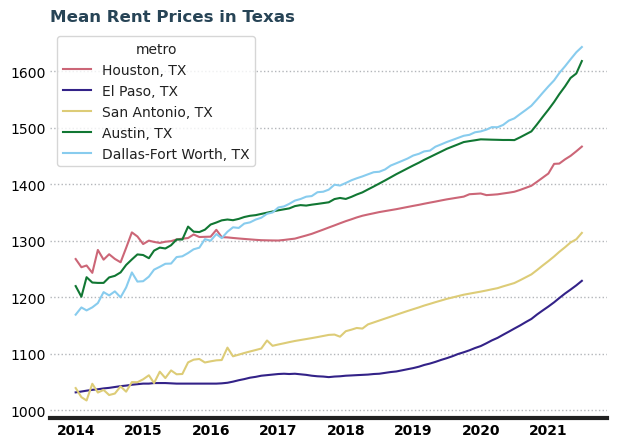

In [27]:
# data set up
graph_df = zori_time[zori_time['metro'].isin(['Dallas-Fort Worth, TX',  
                      'Houston, TX', 
                      'Austin, TX', 
                      'San Antonio, TX',
                      'El Paso, TX'])]

# graphing
fig, ax = plt.subplots()
g = sns.lineplot(data = graph_df, x = 'date',y='rent_index',hue='metro',ax=ax,
            ci = None)
# remove x axis grid lines that were cluttering the graph
ax.grid(b = None, axis = 'x')
# axis spine options are ['left','right','bottom','top']
ax.spines['bottom'].set_visible(True)
# make the highlighted features bold. should be the same side with the visible spine
plt.xticks(fontweight='bold')

g.set(xlabel='', ylabel='',title='Mean Rent Prices in Texas')

plt.show()

In [ ]:
zori_time = pd.melt(zori,
    id_vars=['Time'],
    value_vars=[
        'zori_ssa',
        'lower_prediction_bound',
        'upper_prediction_bound'
    ],
)